# k-Nearest Neighbors

In this lab you will explore tuning a k-Nearest Neighbors model for image classification.

We will use the [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) provided by the [Keras library](https://keras.io/api/datasets/fashion_mnist/).  You will need to install Keras and Tensorflow to access the dataset.

In [ ]:
%pip install keras tensorflow scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.3 MB/s eta 0:00:0031m9.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.5/252.5 MB 24.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.5/671.5 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 56.7 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.9/329.9 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 64.5 MB/s eta 0:00:0031m69.5 MB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 21.5 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached numpy-2.1.3-cp310-cp310-macosx_14_0_arm64.whl (5.4 MB)
 

In [ ]:
import glob
import imageio
import skimage
from matplotlib import pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from skimage.feature import hog

from keras.datasets import fashion_mnist

  Using cached scikit_learn-1.6.1-cp310-cp310-macosx_12_0_arm64.whl (11.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 5.0 MB/s eta 0:00:00 MB/s eta 0:00:01

[notice] A new release of pip available: 22.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Here we load the dataset and show some example images.  Each class is a different category of clothing like shoe, t-shirt, or dress.  The classes are mostly distinguishable by shape, and so they are a good candidate for classification using the [HOG (Histogram of Gradients)](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html) descriptor which captures shape well.

In [12]:
import os, certifi

# point Python’s SSL to certifi
os.environ['SSL_CERT_FILE'] = certifi.where()

from keras.datasets import fashion_mnist
(train_images,train_labels),(val_images,val_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


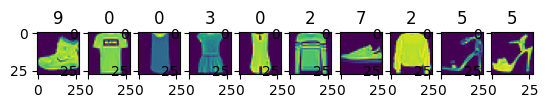

In [13]:
fig,axes = plt.subplots(1,10)
for i,ax in enumerate(axes):
    axes[i].imshow(train_images[i])
    axes[i].set_title(train_labels[i])

Now what we have are lists `train_images` and `train_labels` containing the images and labels for the training set, and the same for the validation set.

1. Compute a HOG descriptor for each image to make two lists, `train_descriptors` and `val_descriptors` (```skimage.feature.hog```).

In [14]:
params = {
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'orientations': 9,
    'block_norm': 'L2-Hys',
    'feature_vector': True,
}

train_descriptors = [
    hog(image, **params)
    for image in train_images
]
val_descriptors = [
    hog(image, **params)
    for image in val_images
]

print("train descriptors shape", train_descriptors[0].shape)


train descriptors shape (144,)


2. Build a k-nearest neighbors classifier on the training set (```sklearn.neighbors.KNeighborsClassifier```).

This model will find the $k$ nearest neighbors to the query point and output the most common label.  Use the default value of $k$.

Run the model on the test set and print out the accuracy (```sklearn.metrics.accuracy_score``` or simply use ```model.score```).

In [ ]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(train_descriptors, train_labels)

val_accuracy = knn.score(val_descriptors, val_labels)
print(f"Validation accuracy (model.score): {val_accuracy:.4f}")
val_preds = knn.predict(val_descriptors)
print("Validation accuracy (accuracy_score):",
      accuracy_score(val_labels, val_preds))

Validation accuracy (model.score): 0.8123
Validation accuracy (accuracy_score): 0.8123


3. Test $k$ from 1 to 101 in increments of 10 and make a plot of the train and test accuracy versus $k$.  Analyze the trade-off between over- and underfitting changes as $k$ increases.  Which is the best setting of $k$?

In [16]:
k_values = list(range(1, 102, 10))
train_acc = []
val_acc   = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_descriptors, train_labels)
    train_acc.append(knn.score(train_descriptors, train_labels))
    val_acc.append(knn.score(val_descriptors,   val_labels))

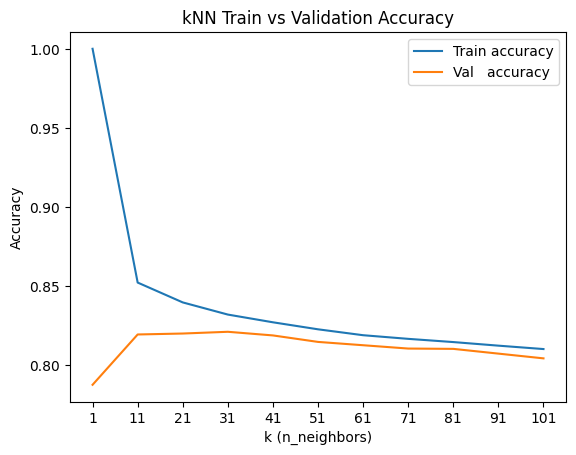

In [17]:
plt.plot(k_values, train_acc, label='Train accuracy')
plt.plot(k_values, val_acc,   label='Val   accuracy')
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.title('kNN Train vs Validation Accuracy')
plt.show()

Seems that the best setting of $k$ is in the range of 11-31 and I would go with 21.